<a href="https://colab.research.google.com/github/chanchalagrawal0107/Statistics-for-Data-Science/blob/main/Stats_for_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics as st
%matplotlib inline

In [27]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
np.mean(df['total_bill'])

np.float64(19.78594262295082)

In [29]:
np.median(df['total_bill'])

np.float64(17.795)

In [30]:
st.mode(df['total_bill'])

13.42

<Axes: ylabel='total_bill'>

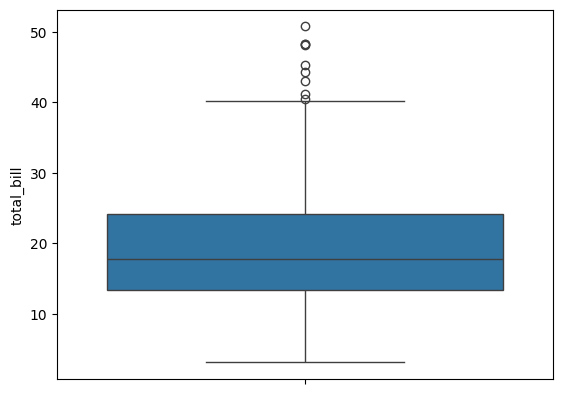

In [31]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

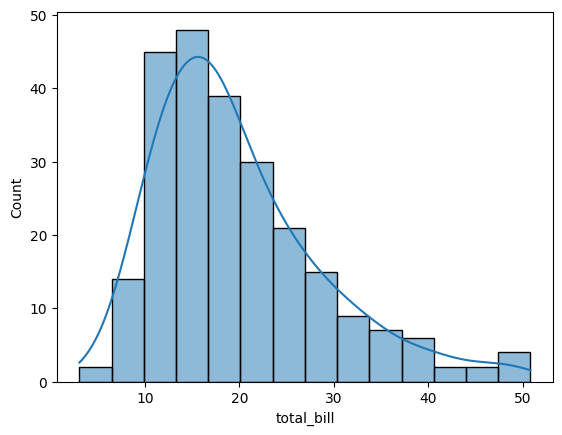

In [32]:
sns.histplot(df['total_bill'], kde='True')

In [33]:
df1 = sns.load_dataset('iris')

In [34]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Count'>

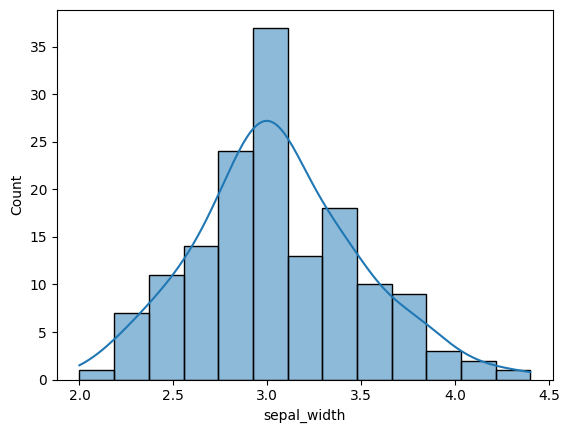

In [35]:
sns.histplot(df1['sepal_width'], kde = 'True')

<Axes: xlabel='count', ylabel='species'>

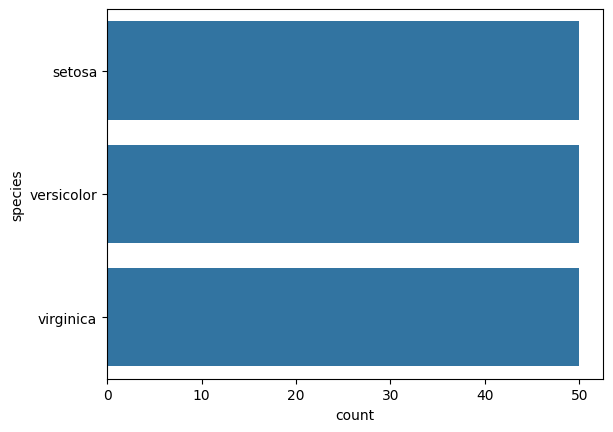

In [36]:
sns.countplot(df1['species'])

In [37]:
np.percentile(df1['sepal_length'], [25, 75])

array([5.1, 6.4])

In [38]:
dataset = [11, 10, 12, 13, 14, 12, 15, 17, 10, 11, 13, 12, 14, 17, 10, 50, 70, 100, 203]

In [39]:
outliers = []
def detect_outliers(data):
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i-mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)

  return outliers

In [40]:
detect_outliers(dataset)

[203]

**IQR**
1. sort the data
2. calculate q1 and q3
3. find iqr(q3-q1)
4. find the lower fence(q1 - 1.5(iqr))
5. find the upper fence(q3 + 1.5(iqr))





In [41]:
dataset = sorted(dataset)
dataset

[10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 14, 14, 15, 17, 17, 50, 70, 100, 203]

In [42]:
q1, q3 = np.percentile(dataset, [25, 75])
print(q1, q3)

11.5 17.0


In [43]:
iqr = q3-q1
print(iqr)

5.5


In [44]:
#find the lower and higher fence
lower_fence = q1 - 1.5 * iqr
higher_fence = q3 + 1.5 * iqr
print(lower_fence, higher_fence)

3.25 25.25


<Axes: >

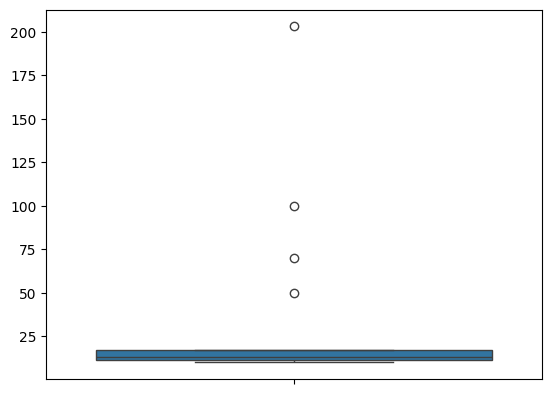

In [45]:
sns.boxplot(dataset)

Suppose the IQ in a certain population is normally distributed with a mean of 100 and std of 15. A researcher wants to know if a new drug affects the IQ levels, so he recruits 20 patients to try it and records their IQ levels. The following code shows how to perform a one sample z-test in Python to determine if the new drug causes a significant difference in IQ levels.

In [46]:
from statsmodels.stats.weightstats import ztest as zt

data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

In [47]:
zt(data, value = 100)

(np.float64(1.5976240527147705), np.float64(0.1101266701438426))

0.11>0.05 --> reject the null hypothesis

In [48]:
## t-test

ages = [10, 20, 35, 50, 28, 40, 55, 18, 16, 55, 30, 25, 43, 18, 30, 28, 14, 24, 16, 17, 32, 35, 26, 27, 65, 18, 43, 23, 21, 20, 19, 70]

In [50]:
ages_mean = np.mean(ages)
ages_mean

np.float64(30.34375)

In [51]:
sample_size = 10
age_sample = np.random.choice(ages, sample_size)

In [52]:
age_sample

array([40, 30, 43, 32, 43, 65, 18, 18, 23, 10])

In [53]:
from scipy.stats import ttest_1samp

In [54]:
ttest_1samp(age_sample, 30)

TtestResult(statistic=np.float64(0.4300244635200135), pvalue=np.float64(0.6772907754681118), df=np.int64(9))

consider another example
ages of the college students(population)
1 class student mean of all the ages

In [55]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
np.random.seed(6)
school_ages = stats.poisson.rvs(loc = 18, mu = 35, size = 1500)
classA_ages = stats.poisson.rvs(loc = 18, mu = 30, size = 60)

In [56]:
school_ages


array([62, 59, 44, ..., 45, 52, 50])

In [57]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47, 41, 45, 51, 43, 45, 48, 50, 40, 52,
       44, 55, 54, 40, 45, 46, 54, 42, 46, 35, 51, 51, 46, 48, 47, 35, 52,
       52, 39, 44, 48, 40, 42, 46, 47, 45])

In [74]:
_,p_value = ttest_1samp(classA_ages, popmean = school_ages.mean())

In [75]:
school_ages.mean()

np.float64(53.303333333333335)

In [76]:
if p_value < 0.05:
  print("Accept H0")
else:
  print("")

Accept H0


In [77]:
import seaborn as sns

In [78]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [80]:
df.corr(numeric_only=True)


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


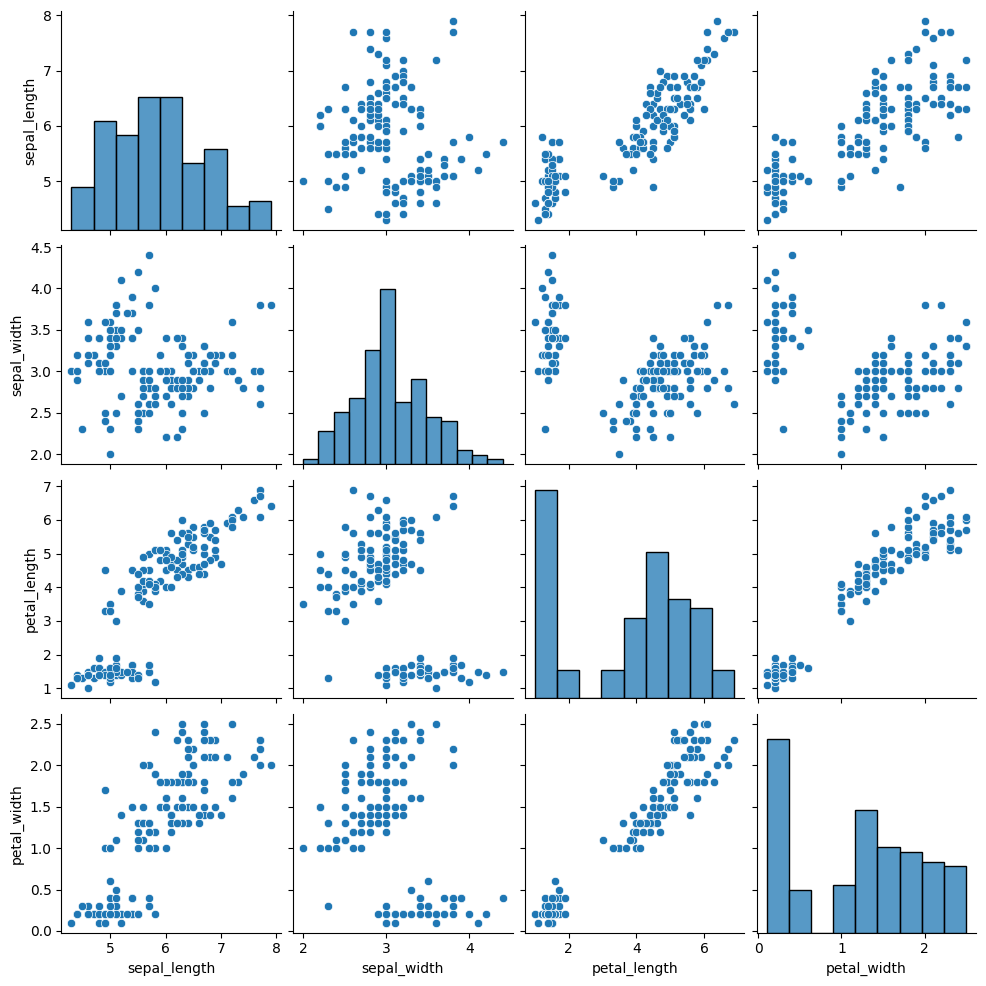

In [81]:
sns.pairplot(df)